## Activation Function

### Threshold Function 

In [1]:
li = [-1,1,2,'s']
type(li)

list

In [4]:
import numpy as np
x = np.array([-1,1,2])
type(x)

numpy.ndarray

In [5]:
x > 0

array([False,  True,  True])

In [6]:
(x > 0).astype(int)

array([0, 1, 1])

In [7]:
def threshold_function(x):
    y = x > 0
    return y.astype(int)

In [8]:
x = np.array([-1,1,2])
threshold_function(x)

array([0, 1, 1])

### Sigmoid Function

In [9]:
np.exp(1)

2.718281828459045

In [19]:
def sigmoid_function(x):
    return 1 / (1+np.exp(-x))

In [20]:
x = np.array([-1,1,2])
sigmoid_function(x)

array([0.26894142, 0.73105858, 0.88079708])

### Tengent Function

In [12]:
def tengent_function(x):
    return (1-np.exp(-2*x)) / (1+np.exp(-2*x))

x = np.array([-1,1,2])
tengent_function(x)

array([-0.76159416,  0.76159416,  0.96402758])

In [13]:
np.tanh(x)

array([-0.76159416,  0.76159416,  0.96402758])

### Relu Function

In [14]:
def relu_function(x):
    return np.maximum(0,x)

x = np.array([-1,1,2])
relu_function(x)

array([0, 1, 2])

## 神經網路建構過程

In [15]:
import numpy as np
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)

In [16]:
Y

array([ 5, 11, 17])

In [17]:
network = {}
network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
network['b1'] = np.array([0.1,0.2,0.3])

network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
network['b2'] = np.array([0.1,0.2])

In [21]:
x = np.array([1,0.5])
a = np.dot(x, network['w1']) + network['b1']

z = sigmoid_function(a)
y = np.dot(z, network['w2']) + network['b2']

y

array([0.51615984, 1.21402696])

### Softmax Function

In [22]:
np.exp(1)

2.718281828459045

In [23]:
np.exp(-100)

3.720075976020836e-44

In [24]:
np.exp(100)

2.6881171418161356e+43

In [26]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

X = np.array([-1,1,2])
softmax_function(X)

array([0.03511903, 0.25949646, 0.70538451])

In [27]:
network = {}
network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
network['b1'] = np.array([0.1,0.2,0.3])

network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
network['b2'] = np.array([0.1,0.2])

In [28]:
x = np.array([1,0.5])
a = np.dot(x, network['w1']) + network['b1']

z = sigmoid_function(a)
y = np.dot(z, network['w2']) + network['b2']

y

array([0.51615984, 1.21402696])

In [29]:
softmax_function(y)

array([0.33228528, 0.66771472])

## Cost Function

In [30]:
def mean_squared_err(y_hat, y):
    return 0.5 * np.sum((y_hat - y) ** 2)

In [31]:
y_hat = np.array([1,2,3])
y     = np.array([2,2,2])
mean_squared_err(y_hat, y)

1.0

In [32]:
np.log(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [33]:
def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

In [34]:
y_hat = np.array([1,2,3])
y     = np.array([2,2,2])

In [35]:
cross_entropy_err(y_hat, y)

-3.583518975122776

## 求導數(偏微分)

In [36]:
def func(x):
    return x ** 2

In [37]:
func(3)

9

In [38]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / (h)

In [39]:
dfunc(func, 3)

6.000100000012054

In [42]:
def dfunc(f, x):
    h = 1e-24
    return (f(x+h) - f(x)) / (h)
dfunc(func, 3)

0.0

In [43]:
x = 3.0

In [44]:
type(x)

float

In [45]:
x + 1e-4

3.0001

In [46]:
x + 1e-12

3.000000000001

In [47]:
x + 1e-24

3.0

In [48]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [49]:
def tfunc(f,x,t):
    d= dfunc(f,x) # 斜率
    y= f(x)-d*x   # 截距
    return d * t + y

Populating the interactive namespace from numpy and matplotlib


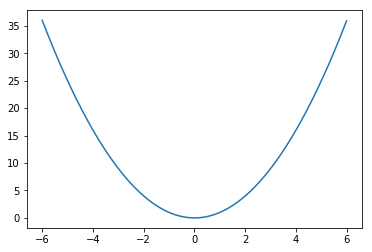

In [52]:
% pylab inline

import matplotlib.pyplot as plt
x = np.arange(-6,6, 0.01)
y= func(x)
plt.plot(x,y)

In [53]:
x

array([-6.  , -5.99, -5.98, ...,  5.97,  5.98,  5.99])

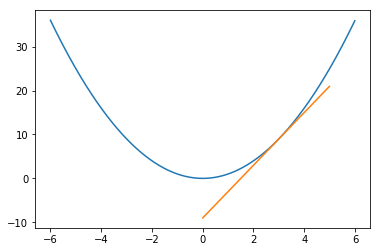

In [55]:
x2= np.arange(0,5, 0.01)
y2= tfunc(func,3, x2)
plt.plot(x,y)
plt.plot(x2, y2)

In [58]:
x = np.array([[1,2,3],[2,3,4]])
x

array([[1, 2, 3],
       [2, 3, 4]])

In [57]:
grad = np.zeros_like(x)
grad

array([[0, 0, 0],
       [0, 0, 0]])

In [77]:
def dfunc2(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

In [79]:
def func(x):
    return x ** 2

In [80]:
def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### Gradient Descent

In [81]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):    
    x = init_x       
    res = [x]
    for i in range(epochs):         
        grad = dfunc(func,x)        
        x = x - grad * lr
        res.append(x)
    return np.array(res)

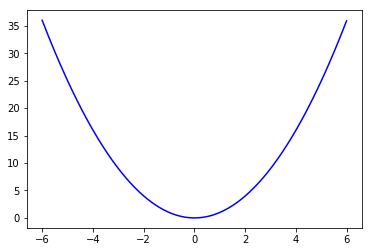

In [82]:
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')

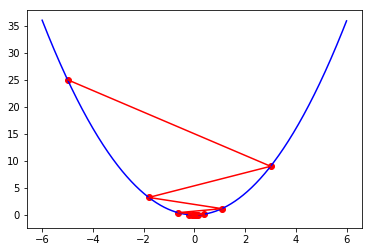

In [87]:

x = gradient_descent(func, -5, lr=0.8)

t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')

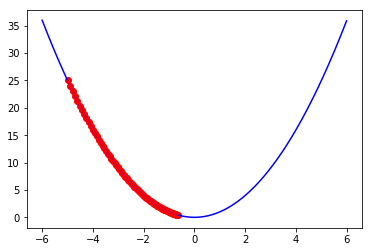

In [88]:
x = gradient_descent(func, -5, lr=0.01)
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')

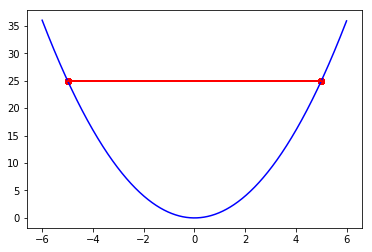

In [89]:
x = gradient_descent(func, -5, lr=1)
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')

### 神經網路的梯度

In [67]:
np.random.seed(42)
np.random.randn(2,3)

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696]])

In [105]:
# 初始網路
x  = np.array([0.6, 0.9])

np.random.seed(42)
weight   = np.random.randn(2,3)

z        = np.dot(x, weight)

# 取得預測值 y_hat
y_hat    = softmax_function(z)

# 計算代價(損失)
y        = np.array([0, 0, 1])

cross_entropy_err(y_hat, y)

1.8025260716416405

In [106]:
def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

In [107]:
def predict(x):
    return np.dot(x, weight)

In [108]:
def loss(x, y):
    z = predict(x)
    y_hat = softmax_function(z)
    loss = cross_entropy_err(y_hat, y)
    return loss

In [110]:
weight

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696]])

In [111]:
func = lambda w: loss(x, y)
dfunc(func, weight)

array([[ 0.43933796,  0.0617329 , -0.50107086],
       [ 0.65900694,  0.09259935, -0.75160629]])

## 訓練神經網路

In [27]:
import numpy as np

def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

In [28]:
def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

In [29]:
def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

In [30]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [31]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

In [32]:
type(net)

__main__.ANN

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()

In [34]:
iris.data.shape

(150, 4)

In [35]:
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [36]:
x = iris.data

In [37]:
iris.target.shape

(150,)

In [38]:
iris.target[0:3]

array([0, 0, 0])

In [39]:
y = np.zeros((len(iris.target), 3))
y.shape

(150, 3)

In [40]:
a = [3,5,6,2,4]
for idx, val in enumerate(a):
    print(idx, val)

0 3
1 5
2 6
3 2
4 4


In [41]:
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [42]:
#y

In [44]:
import time
epochs = 3000
lr     = 0.01

a = time.clock()
train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)
    
print('time elapsed:',time.clock() - a)

time elapsed: 14.169154317053897


Text(0.5,1,'Training Loss')

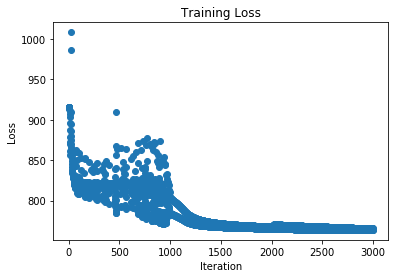

In [171]:
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [173]:
net.params

{'W1': array([[ -0.87441961,  -0.77322172,  -0.55474798,  -0.05179374,
           8.38915269],
        [ -2.54172805,  -0.09890046,  -0.08089103,  -0.27698335,
           8.23313382],
        [  4.20563541,  -1.15115512,  -0.87441082,  -1.82953964,
         -13.06142677],
        [  2.11951998,  -0.46699329,  -0.35648848,  -1.50999026,
         -12.40674514]]),
 'b1': array([-0.52243772, -0.07626442, -0.04931354,  0.3276662 ,  8.88060292]),
 'W2': array([[-6.94930226,  6.70733917,  5.2719754 ],
        [ 0.10649297,  0.01998568, -0.23817517],
        [ 0.13014852,  0.03322949, -0.2629604 ],
        [ 0.10278258,  0.44572193, -1.21648856],
        [ 3.97759761,  2.93498659, -4.83328164]]),
 'b2': array([ 2.30206496, -3.25654214,  0.95447559])}

In [177]:
predicted = np.argmax(net.predict(x), axis=1)

In [178]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [181]:
sum(predicted == iris.target) /len(iris.target)

0.9866666666666667

In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(iris.target, predicted)

0.9866666666666667

In [183]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

In [196]:
net = ANN(input_size=2, hidden_size=5, output_size=3)

In [197]:
x = iris.data[:, [2, 3]]

In [198]:
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [199]:
epochs = 3000
lr     = 0.01

train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)

In [200]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

In [201]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 0. , -0.9],
       [ 0.1, -0.9],
       [ 0.2, -0.9],
       ...,
       [ 7.6,  3.4],
       [ 7.7,  3.4],
       [ 7.8,  3.4]])

In [203]:
Z = net.predict(np.c_[xx.ravel(), yy.ravel()])
Z.shape

(3476, 3)

In [206]:
Z = np.argmax(Z, axis = 1)
Z.shape

(3476,)

In [207]:
Z = Z.reshape(xx.shape)
Z.shape

(44, 79)

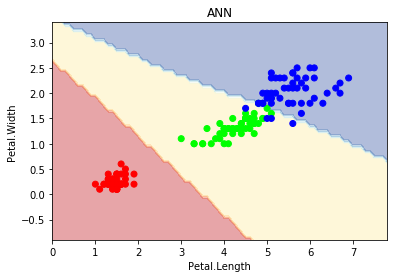

In [208]:
plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap = plt.cm.brg)
plt.title('ANN')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

In [209]:
predicted = np.argmax(net.predict(x), axis=1)

In [210]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(iris.target, predicted)

0.9666666666666667

In [211]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  4, 46]], dtype=int64)

## 隨機梯度下降

In [46]:
iris.target.shape

(150,)

In [ ]:
def cross_entropy_err(y_hat, y):
    y      = y.reshape(1, y.size)
    y_hat  = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size

In [47]:
import numpy as np
net = ANN(input_size=4, hidden_size=5, output_size=3)

epochs      = 3000
lr          = 0.01
batch_size = 30

t0 = time.clock()
train_loss = []
for i in range(epochs): 
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.numerical_gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
time.clock() - t0

8.550601300103267

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Training Loss')

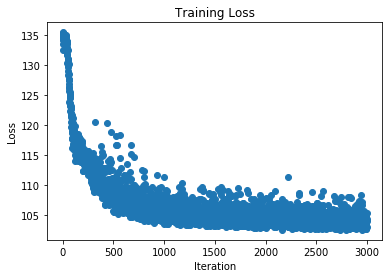

In [50]:
%pylab inline
import matplotlib.pyplot as plt
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

### 針對單筆資料做預測

In [56]:
x2 = np.array([[3,3,2,2],[1,1,1,1]])
#net.predict(x2)

np.argmax(net.predict(x2), axis = 1)

array([1, 2], dtype=int64)

## 使用類神經網路進行迴歸分析

In [4]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/house-prices.csv', index_col = 0)
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
Home,,,,,,,
1,114300,1790,2,2,2,No,East
2,114200,2030,4,2,3,No,East
3,114800,1740,3,2,1,No,East
4,94700,1980,3,2,3,No,East
5,119800,2130,3,3,3,No,East


In [5]:
df['Brick'].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
df['Neighborhood'].unique()

array(['East', 'North', 'West'], dtype=object)

In [7]:
import pandas
brick = pandas.get_dummies(df['Brick'])
del brick['No']
brick.head()

,Yes
Home,
1,0
2,0
3,0
4,0
5,0


In [8]:
import pandas
neighbor = pandas.get_dummies(df['Neighborhood'])
del neighbor['East']
neighbor.head()

,North,West
Home,,
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0


In [9]:
house = pandas.concat([df, brick, neighbor], axis = 1)
del house['Brick']
del house['Neighborhood']

In [10]:
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,North,West
Home,,,,,,,,
1,114300,1790,2,2,2,0,0,0
2,114200,2030,4,2,3,0,0,0
3,114800,1740,3,2,1,0,0,0
4,94700,1980,3,2,3,0,0,0
5,119800,2130,3,3,3,0,0,0


In [11]:
house.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'North',
       'West'],
      dtype='object')

In [12]:
X= house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'North','West']].values

In [13]:
y = house['Price'].values

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
predicted = model.predict(X)
predicted[0:3]

array([103182.88325028, 116127.48050967, 113047.47841973])

In [270]:
y[0:3]

array([114300, 114200, 114800], dtype=int64)

### 使用Keras 作迴歸

In [283]:
! pip install tensorflow

  Running setup.py bdist_wheel for termcolor: started
  Running setup.py bdist_wheel for termcolor: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Running setup.py bdist_wheel for gast: started
  Running setup.py bdist_wheel for gast: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Running setup.py bdist_wheel for absl-py: started
  Running setup.py bdist_wheel for absl-py: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\90\db\f8\2c3101f72ef1ad434e4662853174126ce30201a3e163dcbeca
Successfully built termcolor gast absl-py


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
! pip uninstall keras

In [16]:
n_input = 7
n_hidden_1 = 4
n_classes = 1

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_classes))

In [18]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [24]:
history = model.fit(X, y,
                    batch_size=30,
                    epochs=1000,
                    verbose=0)

In [25]:
predicted = model.predict(X)
predicted[0:3]

array([[116232.49],
       [131926.86],
       [113139.07]], dtype=float32)

In [26]:
y[0:3]

array([114300, 114200, 114800], dtype=int64)

## 反向傳播算法
- http://www.wolframalpha.com/input/?i=derivative+1%2Fx

In [69]:
class Relu:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        self.cache = (x <=0)
        out = np.maximum(0,x)
        return out

    def backward(self, dout):
        dout[self.cache] = 0
        dx = dout
        return dx

In [71]:
a = Relu()
print(a.cache)

None


In [72]:
x = np.array([-1,1,2])
a.forward(x)

array([0, 1, 2])

In [73]:
a.cache

array([ True, False, False])

In [74]:
y = np.array([2,3,4])
print(a.backward(y))

[0 3 4]


In [75]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1/ (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        y  = self.out
        dx = dout * y * (1-y)
        return dx

In [76]:
s = Sigmoid()
print(s.out)

None


In [77]:
x = np.array([-1,1,2])
print(s.forward(x))

[0.26894142 0.73105858 0.88079708]


In [78]:
print(s.out)

[0.26894142 0.73105858 0.88079708]


In [79]:
y = np.array([2,3,4])
print(s.backward(y))

[0.39322387 0.5898358  0.41997434]


In [80]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout)
        return dx

y = np.array([2,3,4])
print(s.backward(y))

[0.39322387 0.5898358  0.41997434]


In [81]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y_hat = None 
        self.y = None 

    def forward(self, x, y):
        self.y = y
        self.y_hat = softmax_function(x)
        self.loss = cross_entropy_err(self.y_hat, self.y)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        dx = (self.y_hat - self.y) / batch_size
        return dx

In [82]:

def cross_entropy_err(y_hat, y):
    y      = y.reshape(1, y.size)
    y_hat  = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size

In [83]:
def softmax_function(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [84]:
import numpy as np
from collections import OrderedDict

class ANN:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return self.lastLayer.forward(y_hat, y)
  
    def gradient(self, x, y):
        # forward
        self.loss(x, y)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [85]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [91]:
import random
import time

epochs     = 3000
lr         = 0.01
batch_size = 30

net = ANN(input_size=4, hidden_size=5, output_size=3)

t0 = time.clock()
train_loss = []
for i in range(epochs): 
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch   = iris.data[idx]
    y_batch   = y[idx]
    grad = net.gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
    
time.clock() - t0

0.5309964939324345

Text(0.5,1,'Training Loss')

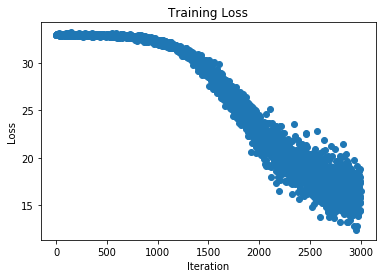

In [90]:
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

## 手寫數字辨識

In [92]:
from sklearn.datasets import load_digits

In [93]:
digits = load_digits()

In [94]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [95]:
digits.data.shape

(1797, 64)

In [96]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [97]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [98]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

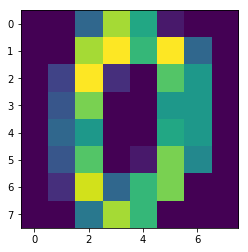

In [99]:
plt.imshow(digits.images[0])

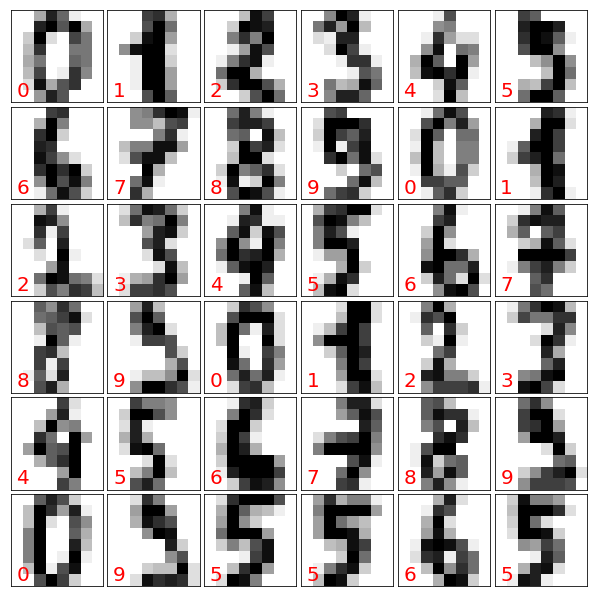

In [100]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(digits.data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [102]:
X_scaled = scaler.transform(digits.data)

In [104]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [105]:
X_scaled[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

### 使用手動建立的ANN

In [106]:
import numpy as np
from collections import OrderedDict

class ANN:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return self.lastLayer.forward(y_hat, y)
  
    def gradient(self, x, y):
        # forward
        self.loss(x, y)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [108]:
x.shape

(1797, 64)

In [107]:
from sklearn.datasets import load_iris
x = X_scaled
y = np.zeros((len(digits.target), 10))
for idx, val in enumerate(digits.target):
    y[idx, val] = 1

In [111]:
import random
import time

epochs     = 10000
lr         = 0.01
batch_size = 30

net = ANN(input_size=64, hidden_size=30, output_size=10)

t0 = time.clock()
train_loss = []
for i in range(epochs): 
    idx = np.random.choice(x.shape[0], batch_size)
    x_batch   = x[idx]
    y_batch   = y[idx]
    grad = net.gradient(x_batch,y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)
    
time.clock() - t0

2.6556178725177233

Text(0.5,1,'Training Loss')

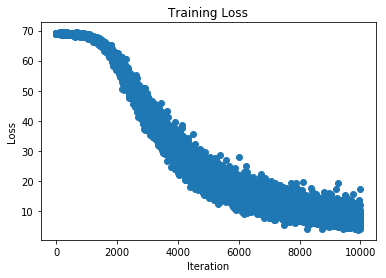

In [112]:
plt.scatter(range(0,10000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

In [115]:
predicted = np.argmax(net.predict(X_scaled), axis = 1)

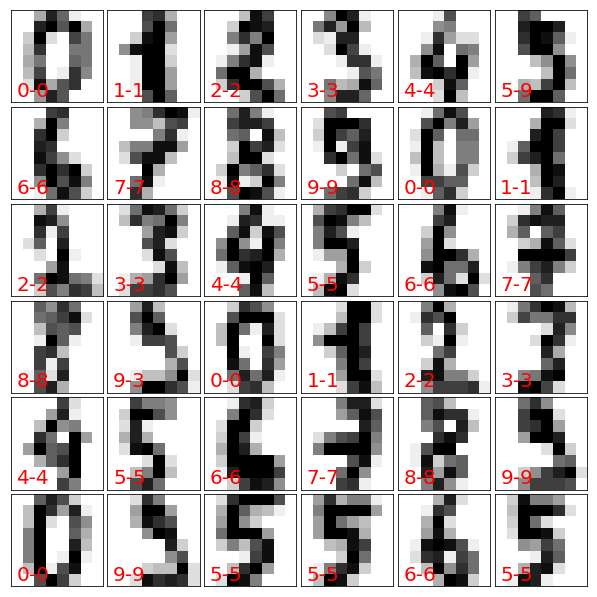

In [116]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(digits.target, predicted)

0.9582637729549248

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(digits.target, predicted)

array([[175,   0,   0,   0,   2,   0,   1,   0,   0,   0],
       [  0, 169,   0,   0,   2,   0,   1,   0,   2,   8],
       [  0,   2, 175,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   2, 172,   0,   3,   0,   0,   3,   3],
       [  0,   1,   0,   0, 178,   0,   0,   0,   2,   0],
       [  0,   0,   0,   1,   0, 177,   1,   0,   0,   3],
       [  2,   1,   0,   0,   0,   0, 178,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 177,   0,   1],
       [  0,  12,   0,   0,   1,   3,   1,   0, 156,   1],
       [  0,   2,   0,   3,   1,   4,   0,   2,   3, 165]], dtype=int64)

### 使用sklearn 辨識手寫數字

In [124]:
from sklearn.neural_network import MLPClassifier
#?MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', 
                    max_iter = 1000,solver='sgd',learning_rate='constant',
                    learning_rate_init=0.001)

mlp.fit(X_scaled,digits.target)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [125]:
predicted = mlp.predict(X_scaled)

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(digits.target, predicted)

0.9988870339454646

In [133]:
from PIL import Image
import numpy
img = Image.open('4.bmp')
img  = numpy.asarray(img)
img = 15 - img
img

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15, 15,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0, 15,  0,  0],
       [ 0,  0, 15,  0,  0, 15,  0,  0],
       [ 0, 15, 15,  0,  0, 15,  0,  0],
       [ 0, 15, 15, 15, 15, 15, 15,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0]], dtype=uint8)

In [138]:
digits.data[0].shape

(64,)

In [143]:
t0 = np.expand_dims(img.reshape(64,), axis = 0)

In [144]:
t1 = scaler.transform(t0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [145]:
t1

array([[ 0.        , -0.33501649, -1.09493684, -2.78643746, -2.76424203,
        -1.02065685, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
         0.8519818 ,  0.75962245, -2.14988554, -1.35109507, -0.51499146,
        -0.13043338, -0.04462507, -0.72764628,  0.89588044, -1.20543167,
        -1.14964846,  1.16109164, -0.54880546, -0.11422184, -0.03337973,
        -0.78510524,  0.95451315, -1.49990136, -1.61406277,  1.26871488,
        -0.62889588, -0.04723238,  0.        ,  3.63871114,  1.15971234,
        -1.44763006, -1.73666443,  1.06593412, -0.82269451,  0.        ,
        -0.06134367,  4.50060728,  1.24209958,  1.20688552,  1.17098727,
         1.18784054,  2.6661342 , -0.08874162, -0.03543326, -0.40357499,
        -1.33033057, -1.82551805, -1.77645875,  1.03516683, -0.75743581,
        -0.20978513, -0.02359646, -0.29908135, -1.08938309, -2.76417101,
        -2.39411016,  1.39616473, -0.5056698 , -0.19600752]])

In [146]:
mlp.predict(t1)

array([4])